[[3. 1. 3.]
 [1. 6. 0.]
 [2. 0. 4.]]
Accuracy: [0.65 0.9  0.75]
Precision: [0.5        0.85714286 0.57142857]
Recall: [0.42857143 0.85714286 0.66666667]
F1 Score: [0.46153846 0.85714286 0.61538462]


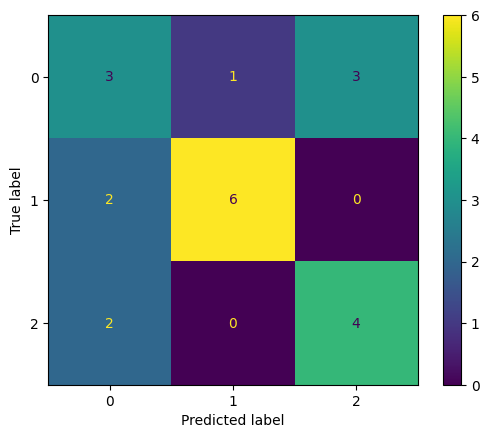

In [11]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred, num_classes):
  # Initialize the confusion matrix of size(nXn) where n=number of classes
  conf_matrix = np.zeros((num_classes, num_classes))
  # Iterate over each sample to create confusion matrix with respect to A
  #.     A.   B.   C.   Predicted
  #.  A  TP   FN   FN
  #   B  FP   TN   TN
  #   C  FP   TN   TN
  for true_class, pred_class in zip(y_true, y_pred):
    #Update the corresponding cell in the confusion matrix
    conf_matrix[int(true_class), int(pred_class)] += 1
  return conf_matrix
def calculate_metrics(conf_matrix):
  #Calculating true positives, false positives, false negatives for each class
  TP = np.diag(conf_matrix)  #obtained as a matrix of order 1xn
  FP = np.sum(conf_matrix, axis=0) - TP   #sum of column-TP
  FN = np.sum(conf_matrix, axis=1) - TP   #sum of row -TP
  # calculating true negatives for each class
  TN = np.sum(conf_matrix) - (TP + FP + FN) #remaining part

  # calculating accuracy for each class
  accuracy = (TP + TN) / np.sum(conf_matrix)

  # calculating precision for each class
  precision = TP / (TP + FP)

  # calculating recall for each class
  recall = TP / (TP + FN)

  # calculating F1 score for each class
  f1_score = 2 * (precision * recall) / (precision + recall)

  return accuracy, precision, recall, f1_score

#demonstrating for a small data set

y_test=[1,2,1,2,0,0,1,0,1,2,0,1,2,0,1,2,1,2,0,0]
y_predicted=[1,2,1,0,2,0,1,1,1,2,2,0,0,0,1,2,1,2,2,0,0]
conf_matrix=calculate_confusion_matrix(y_test,y_predicted,3)
accuracy, precision, recall, f1_score = calculate_metrics(conf_matrix)
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

# display matrix
cm_display.plot()
plt.show()
